In [18]:
# Load packages
import numpy as np
import pandas as pd
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders import OrdinalEncoder, OneHotEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from pathlib import Path
import shared_functions as sf

In [19]:
# Define model & file name
model_name = 'LinearBaselineModel'
file_name = 'property-sales_new-york-city_2022_pre-processed'

In [20]:
# Create output directory for exports
Path(f'../models/{model_name}').mkdir(parents=True, exist_ok=True)

In [21]:
# Load subset keys as list
subset_keys = pd.read_csv(f'../data/processed/subset_keys.csv').squeeze().to_list()

In [22]:
# Load subset index as series
subset_index = pd.read_csv(f'../data/processed/subset_index.csv', index_col=0)

In [23]:
# Use GPU when possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu').type
print(f'Device type: {device.upper()}')

Device type: CPU


In [24]:
# Set random seed
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [25]:
dataset_params = {
    'data': f'../data/processed/{file_name}.parquet',
    'target_name': 'sale_price',
    'to_drop': 'sale_price_adj',
    'subset_index': '../data/processed/subset_index.csv',
    'input_scaler': StandardScaler(),
    'target_scaler': None,
    'categorical_encoder': TargetEncoder(),
    'numerical_imputer': SimpleImputer(missing_values=pd.NA, strategy='mean'),
    'data_overview': f'../data/processed/{file_name}_data-overview.csv'
    }

In [26]:
# Instantiate datasets
subsets = {subset_key: sf.MultiModalDataset(**dataset_params, subset=subset_key) for subset_key in subset_keys}
dataset = sf.MultiModalDataset(**dataset_params)

In [27]:
# Define model architecture
class LinearBaselineModel(nn.Module):
    # Define model components
    def __init__(self):
        super().__init__()

        # Define linear model
        self.LinearModel = nn.Linear(25, 1)

    # Define forward pass
    def forward(self, X_text):
        y = self.LinearModel(X_text)
        return y

In [28]:
# Instantiate model
model = LinearBaselineModel().to(device)

In [29]:
# Calculate number of model parameters
n_params = sum(parameter.numel() for parameter in model.parameters())
print(f'# model paramters: {n_params}')

# model paramters: 26


In [30]:
# Train model
model, history = sf.train_model(
    model=model,
    dataset_train=subsets['train'],
    dataset_val=subsets['val'],

    # Define loss & optimizer
    loss_function=nn.MSELoss().to(device),
    optimizer=torch.optim.SGD(model.parameters(), lr=.1),

    # Define computing device
    device=device,

    # Define training parameters
    epochs=50,
    patience=50,
    delta=0,
    batch_size=len(dataset),
    shuffle=True,
    num_workers=0,
    pin_memory=True,

    # Define save locations
    save_state_dict_as=f'../models/{model_name}/state_dict.pt',
    save_history_as=f'../models/{model_name}/history.csv'
    )

100%|██████████| 1/1 [00:00<00:00,  3.79it/s]


Epoch  1/50: RMSE_train: 1,734,424, RMSE_val: 1,403,885


100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


Epoch  2/50: RMSE_train: 1,381,379, RMSE_val: 1,235,491


100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


Epoch  3/50: RMSE_train: 1,191,285, RMSE_val: 1,124,720


100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


Epoch  4/50: RMSE_train: 1,064,937, RMSE_val: 1,052,781


100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


Epoch  5/50: RMSE_train: 977,928, RMSE_val: 1,004,818


100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


Epoch  6/50: RMSE_train: 918,340, RMSE_val: 974,333


100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


Epoch  7/50: RMSE_train: 877,966, RMSE_val: 954,960


100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


Epoch  8/50: RMSE_train: 850,835, RMSE_val: 942,976


100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


Epoch  9/50: RMSE_train: 832,683, RMSE_val: 935,652


100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


Epoch 10/50: RMSE_train: 820,541, RMSE_val: 931,286


100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


Epoch 11/50: RMSE_train: 812,392, RMSE_val: 928,759


100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


Epoch 12/50: RMSE_train: 806,885, RMSE_val: 927,367


100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


Epoch 13/50: RMSE_train: 803,126, RMSE_val: 926,666


100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


Epoch 14/50: RMSE_train: 800,526, RMSE_val: 926,378


100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


Epoch 15/50: RMSE_train: 798,698, RMSE_val: 926,330


100%|██████████| 1/1 [00:00<00:00,  3.89it/s]


Epoch 16/50: RMSE_train: 797,390, RMSE_val: 926,415
EarlyStopping counter: 1 out of 50


100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


Epoch 17/50: RMSE_train: 796,434, RMSE_val: 926,571
EarlyStopping counter: 2 out of 50


100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


Epoch 18/50: RMSE_train: 795,720, RMSE_val: 926,757
EarlyStopping counter: 3 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


Epoch 19/50: RMSE_train: 795,174, RMSE_val: 926,952
EarlyStopping counter: 4 out of 50


100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


Epoch 20/50: RMSE_train: 794,748, RMSE_val: 927,142
EarlyStopping counter: 5 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


Epoch 21/50: RMSE_train: 794,408, RMSE_val: 927,321
EarlyStopping counter: 6 out of 50


100%|██████████| 1/1 [00:00<00:00,  4.17it/s]


Epoch 22/50: RMSE_train: 794,132, RMSE_val: 927,486
EarlyStopping counter: 7 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


Epoch 23/50: RMSE_train: 793,903, RMSE_val: 927,636
EarlyStopping counter: 8 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


Epoch 24/50: RMSE_train: 793,712, RMSE_val: 927,771
EarlyStopping counter: 9 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


Epoch 25/50: RMSE_train: 793,549, RMSE_val: 927,892
EarlyStopping counter: 10 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


Epoch 26/50: RMSE_train: 793,408, RMSE_val: 927,999
EarlyStopping counter: 11 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.84it/s]


Epoch 27/50: RMSE_train: 793,287, RMSE_val: 928,095
EarlyStopping counter: 12 out of 50


100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


Epoch 28/50: RMSE_train: 793,181, RMSE_val: 928,180
EarlyStopping counter: 13 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Epoch 29/50: RMSE_train: 793,087, RMSE_val: 928,255
EarlyStopping counter: 14 out of 50


100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


Epoch 30/50: RMSE_train: 793,004, RMSE_val: 928,323
EarlyStopping counter: 15 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.91it/s]


Epoch 31/50: RMSE_train: 792,930, RMSE_val: 928,382
EarlyStopping counter: 16 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.97it/s]


Epoch 32/50: RMSE_train: 792,864, RMSE_val: 928,435
EarlyStopping counter: 17 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


Epoch 33/50: RMSE_train: 792,805, RMSE_val: 928,482
EarlyStopping counter: 18 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


Epoch 34/50: RMSE_train: 792,751, RMSE_val: 928,524
EarlyStopping counter: 19 out of 50


100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


Epoch 35/50: RMSE_train: 792,703, RMSE_val: 928,562
EarlyStopping counter: 20 out of 50


100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


Epoch 36/50: RMSE_train: 792,659, RMSE_val: 928,595
EarlyStopping counter: 21 out of 50


100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


Epoch 37/50: RMSE_train: 792,619, RMSE_val: 928,626
EarlyStopping counter: 22 out of 50


100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


Epoch 38/50: RMSE_train: 792,582, RMSE_val: 928,653
EarlyStopping counter: 23 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.93it/s]


Epoch 39/50: RMSE_train: 792,549, RMSE_val: 928,677
EarlyStopping counter: 24 out of 50


100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


Epoch 40/50: RMSE_train: 792,518, RMSE_val: 928,700
EarlyStopping counter: 25 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


Epoch 41/50: RMSE_train: 792,490, RMSE_val: 928,720
EarlyStopping counter: 26 out of 50


100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


Epoch 42/50: RMSE_train: 792,463, RMSE_val: 928,738
EarlyStopping counter: 27 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


Epoch 43/50: RMSE_train: 792,439, RMSE_val: 928,755
EarlyStopping counter: 28 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


Epoch 44/50: RMSE_train: 792,417, RMSE_val: 928,771
EarlyStopping counter: 29 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


Epoch 45/50: RMSE_train: 792,396, RMSE_val: 928,786
EarlyStopping counter: 30 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


Epoch 46/50: RMSE_train: 792,376, RMSE_val: 928,799
EarlyStopping counter: 31 out of 50


100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


Epoch 47/50: RMSE_train: 792,358, RMSE_val: 928,812
EarlyStopping counter: 32 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


Epoch 48/50: RMSE_train: 792,341, RMSE_val: 928,824
EarlyStopping counter: 33 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


Epoch 49/50: RMSE_train: 792,325, RMSE_val: 928,836
EarlyStopping counter: 34 out of 50


100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

Epoch 50/50: RMSE_train: 792,310, RMSE_val: 928,847
EarlyStopping counter: 35 out of 50


In [31]:
# Generate model predictions
predictions = sf.get_predictions(model, dataset, subset_index, device, save_as=f'../models/{model_name}/predictions.csv')

In [32]:
# Compute performance metrics
metrics = sf.get_metrics(predictions, subset_keys, save_as=f'../models/{model_name}/perf_metrics.csv')

Subset        RMSE         MAE   MAPE     R2
--------------------------------------------
train   797389.957  468584.647  0.645  0.592
val     926329.505  542833.091  0.756  0.440
test    952651.453  547140.936  0.739  0.414
--------------------------------------------
total   844035.506  491719.728  0.675  0.542


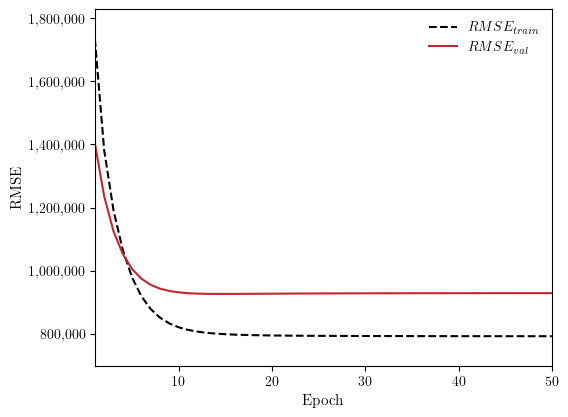

In [33]:
# Plot training history
sf.plot_history(history, save_as=f'../models/{model_name}/history.pdf')

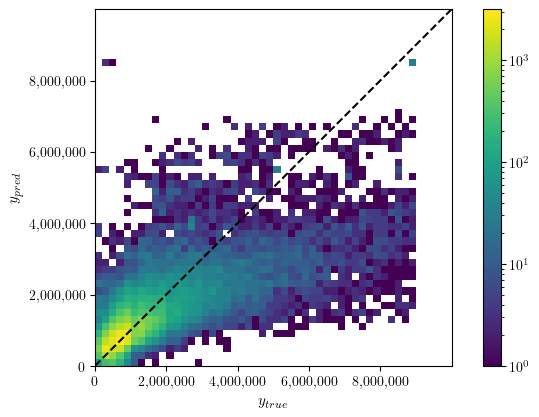

In [34]:
# Plot predictions vs actuals
sf.plot_pred_vs_actual(predictions, save_as=f'../models/{model_name}/predictions_vs_actuals.pdf')